# Demo: Extracting curve data from PDFs

The notebook demonstrates how to extract `curve` objects from PDFs using `pdfplumber`.

In [1]:
import pdfplumber

## Load the PDF

Here, we're using the USDA's "[National Weekly Ag Energy Round-Up](https://www.ams.usda.gov/mnreports/lswagenergy.pdf)", a weekly one-page report.

In [2]:
report = pdfplumber.open("../pdfs/ag-energy-round-up-2017-02-24.pdf").pages[0]

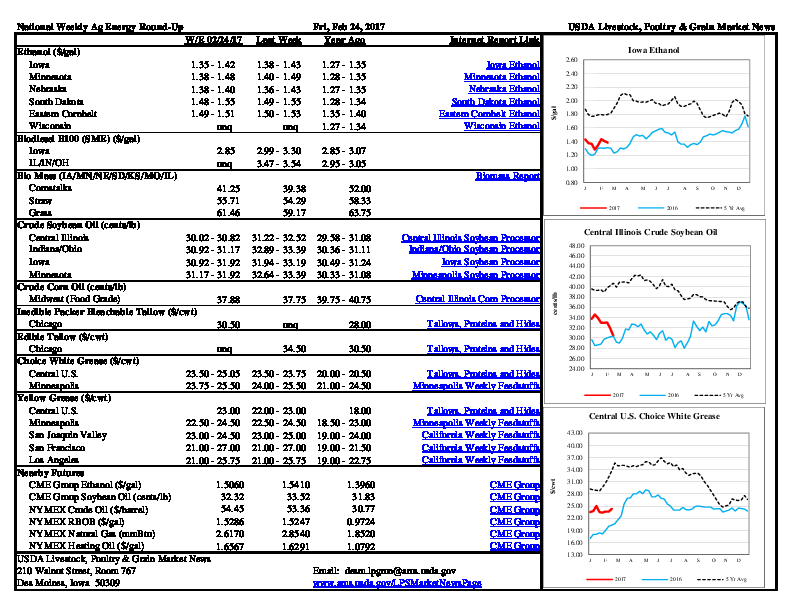

In [3]:
im = report.to_image()
im

## Examine the `curve` objects

`Page` objects have a `.curves` property, which contains a list of `curve` objects found on the page. This report contains 12 curves, four per chart:

In [4]:
len(report.curves)

12

Here's what the first `curve` object looks like:

In [5]:
report.curves[0]

{'bottom': Decimal('168.720'),
 'doctop': Decimal('59.740'),
 'height': Decimal('108.980'),
 'linewidth': Decimal('0.250'),
 'object_type': 'curve',
 'page_number': 1,
 'points': [(Decimal('583.710'), Decimal('168.720')),
  (Decimal('749.790'), Decimal('168.720')),
  (Decimal('583.710'), Decimal('155.160')),
  (Decimal('749.790'), Decimal('155.160')),
  (Decimal('583.710'), Decimal('141.480')),
  (Decimal('749.790'), Decimal('141.480')),
  (Decimal('583.710'), Decimal('127.920')),
  (Decimal('749.790'), Decimal('127.920')),
  (Decimal('583.710'), Decimal('114.240')),
  (Decimal('749.790'), Decimal('114.240')),
  (Decimal('583.710'), Decimal('100.680')),
  (Decimal('749.790'), Decimal('100.680')),
  (Decimal('583.710'), Decimal('87.000')),
  (Decimal('749.790'), Decimal('87.000')),
  (Decimal('583.710'), Decimal('73.320')),
  (Decimal('749.790'), Decimal('73.320')),
  (Decimal('583.710'), Decimal('59.740')),
  (Decimal('749.790'), Decimal('59.740'))],
 'top': Decimal('59.740'),
 'width'

## Display the curves

We can get a quick sense of where the curves are by passing them to `PageImage.draw_lines`:

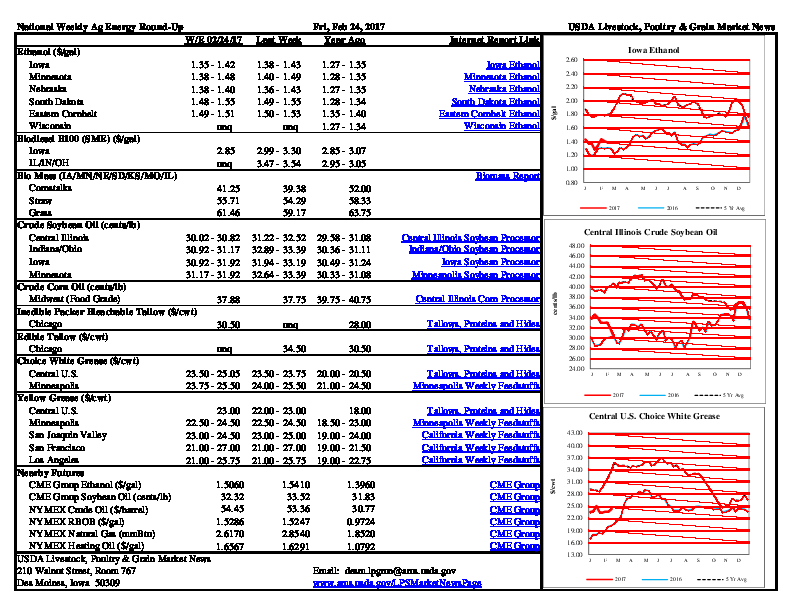

In [6]:
im.draw_lines(report.curves, stroke="red", stroke_width=2)

We can get a more better sense of the curves by cycling through a four-color palette:

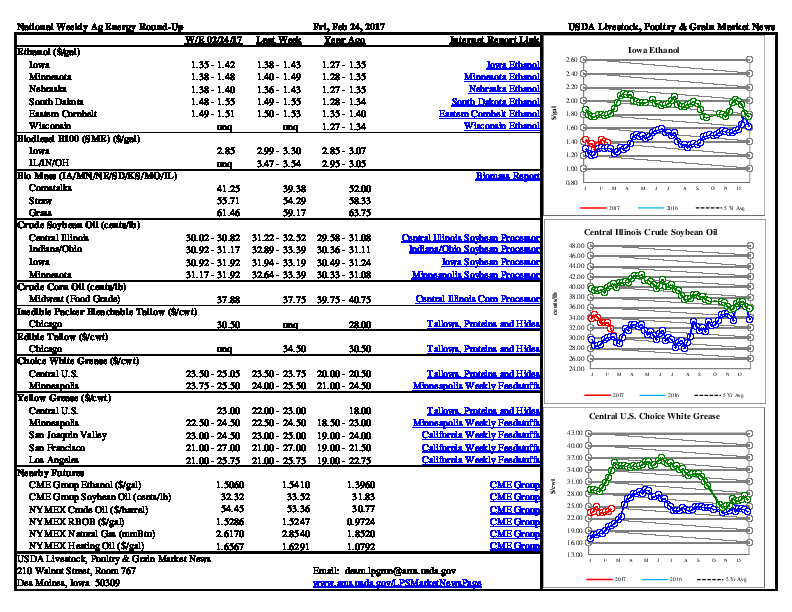

In [7]:
im.reset()
colors = [ "gray", "red", "blue", "green" ]
for i, curve in enumerate(report.curves):
    stroke = colors[i%len(colors)]
    im.draw_circles(curve["points"], radius=3, stroke=stroke, fill="white")
    im.draw_line(curve["points"], stroke=stroke, stroke_width=2)
im

__Note:__ Above, you'll notice the zig-zag pattern made by the curve that describes the gridlines. That's because `pdfminer` (and, hence, `pdfplumber`) currently only provide access to a the *points* on a curve, and not the actual *path* of the curve. The actual path can — as with the gridlines — include both "lineto" and "moveto" commands.

---

---

---